# Wrangling Smart Home Dataset

# Pipeline:

##### 1. Missing Values 
    Categorical
    Numerical
    DateTime
    Mis-spelled values

##### 2. Data Types

##### 3. Transformation

    Column rename
    Row deletion
    Column deletion

##### 4. Outliers
    Dist Plots
    Box Plots

##### 5. Inferential Analysis

    ANOVA
    

In [2]:
import pandas as pd 
import datetime
import numpy as np
from matplotlib import pyplot as plt 
import time
import seaborn as sns 
import missingno as msno
from scipy import stats

In [4]:
df = pd.read_excel (r'C:\Users\shehz\Documents\BI Project\HomeC.xlsx')
df.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
df.dtypes

time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

In [6]:
df.shape

(503911, 32)

In [7]:
df.tail(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503901,1452128301,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503902,1452128302,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503903,1452128303,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503904,1452128304,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values Analysis

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64


<AxesSubplot:>

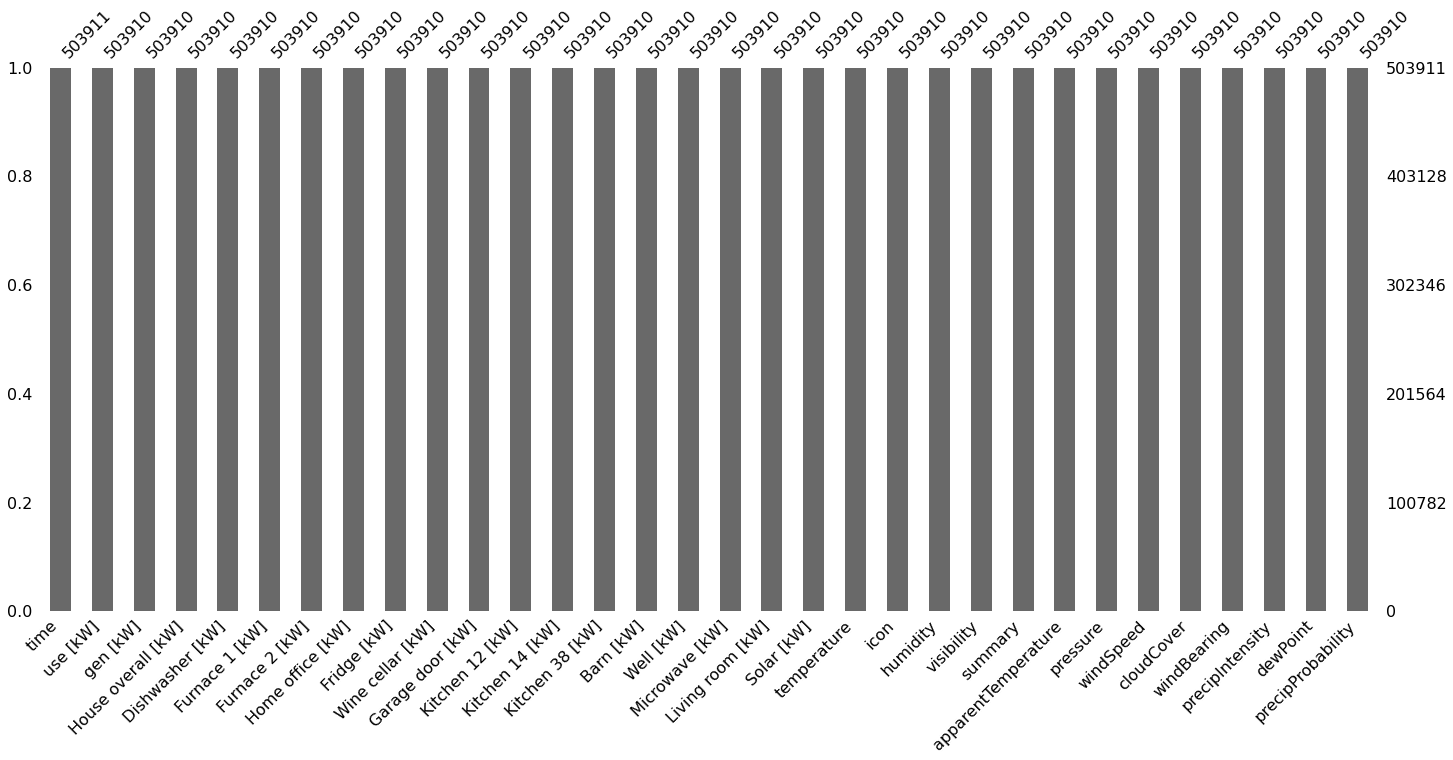

In [8]:
#Dealing with null values
print(df.isna().sum())
msno.bar(df)
#The slash in the last row is causing the only mssing value in the dataset, so we remove it 

In [9]:
df=df.dropna()


time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64


<AxesSubplot:>

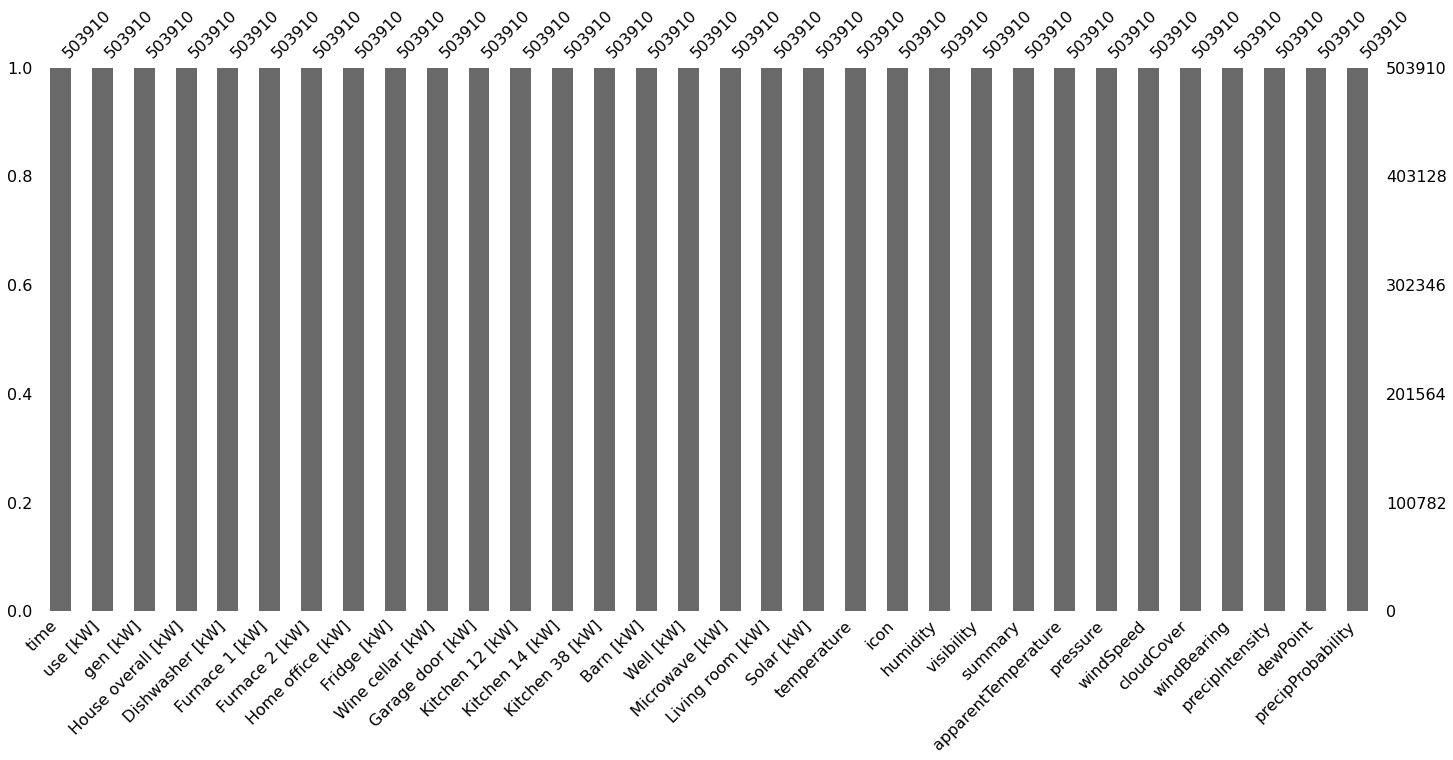

In [10]:
print(df.isna().sum())
msno.bar(df)
#Missing values replaced

In [11]:
df['time'].astype(str).astype(int)

0         1451624400
1         1451624401
2         1451624402
3         1451624403
4         1451624404
             ...    
503905    1452128305
503906    1452128306
503907    1452128307
503908    1452128308
503909    1452128309
Name: time, Length: 503910, dtype: int32

In [12]:
#df['time']=pd.to_datetime(df['time'], unit='m')
#your_timestamp = 1331856000000
df['time']=datetime.datetime.fromtimestamp(df['time'] / 1e3)
#df['time'] =  pd.to_datetime(df['time'], format='%d%b%Y:%H:%M:%S.%f')

TypeError: cannot convert the series to <class 'int'>

In [13]:
#Since none of the methods worked using the to_datetime function
#The technique was to acquire knowledge of time of readings from the online
# link, then apply the sequence to data set. Kaggle link said the the readings were
#from 1 jan 2016  to 15th dec 2016 (350 days) so thats what we try to achieve
#the conversion through a different technique by using a unix epoch method to make the column a 
#time series of our own which matches the given range
time=pd.date_range('2016-01-01 05:00:00', periods=503910, freq='min')
time=pd.DatetimeIndex(time)
df['time']=time

In [14]:
df['time']

0        2016-01-01 05:00:00
1        2016-01-01 05:01:00
2        2016-01-01 05:02:00
3        2016-01-01 05:03:00
4        2016-01-01 05:04:00
                 ...        
503905   2016-12-16 03:25:00
503906   2016-12-16 03:26:00
503907   2016-12-16 03:27:00
503908   2016-12-16 03:28:00
503909   2016-12-16 03:29:00
Name: time, Length: 503910, dtype: datetime64[ns]

In [15]:
df['cloudCover']= df['cloudCover'].replace('cloudCover', np.nan)

In [16]:
print((df['cloudCover'].isnull().sum()/df.shape[0])*100, '%\n')
#We have printed to see how much of the whole column had 'CloudCover' as a value
#whereas cloudCover is a numeric column
#We use backfill to replace the string value from this column
df['cloudCover']=df['cloudCover'].fillna(method='bfill')
df['cloudCover']=df['cloudCover'].astype(float)
#Backfill takes the valid value and takes it to replace all the way to the first row.

0.01150999186362644 %



In [17]:
 print(df['cloudCover'].value_counts())

0.00    68236
0.31    49899
1.00    48705
0.03    33940
0.04    24117
        ...  
0.71      114
0.64      114
0.56       58
0.53       58
0.59       57
Name: cloudCover, Length: 77, dtype: int64


In [18]:
df['House overall [kW]'].equals(df['use [kW]'])
#Answer=true means that both columns are exactly the same

True

In [19]:
df['Solar [kW]'].equals(df['gen [kW]'])
#Answer=true means that both columns are exactly the same

True

In [20]:
df.drop('use [kW]', axis =1, inplace=True)
df.drop('Solar [kW]', axis =1, inplace=True)

In [21]:
df['icon'].equals(df['summary'])
#Answer=false means that both columns are not the same
#We still want to drop the icpn column because:
#1. it is changing exactly as summary column
#2. Summary column does the same thing which icon column does, do its redundant to have both


False

In [22]:
df.drop('icon', axis =1, inplace=True)
df.shape

(503910, 29)

In [23]:
#Worth noticing that we have no cost or price expenditure indicators in the dataset. 
#So we introduce a column which tells us the price of electricity being spent instantaneously. 
#We get this column by taking the electricity price and multiplying it to the total electricity used.
#for analysis, we use KE data. According to KE online website https://nepra.org.pk/tariff/Tariff/KESC/2019/SRO%20576%20I%202019%2022-05-2019.PDF
#, the price for 1 kW per minute in 2016 was 0.27166 ruppees
df['Usage Electricity']=0.27166*df['House overall [kW]']

In [24]:
#since we are also generating electricity using solar power, it 
#would make sense to see how much electricity we are making too
df['Electricity generated']=0.27166*df['gen [kW]']

In [25]:
df.head()

,time,gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Usage Electricity,Electricity generated
0,2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.253414,0.000946
1,2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.253821,0.000942
2,2016-01-01 05:02:00,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.253137,0.000942
3,2016-01-01 05:03:00,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.277650,0.000946
4,2016-01-01 05:04:00,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,...,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,0.309529,0.000942


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House overall [kW]'>

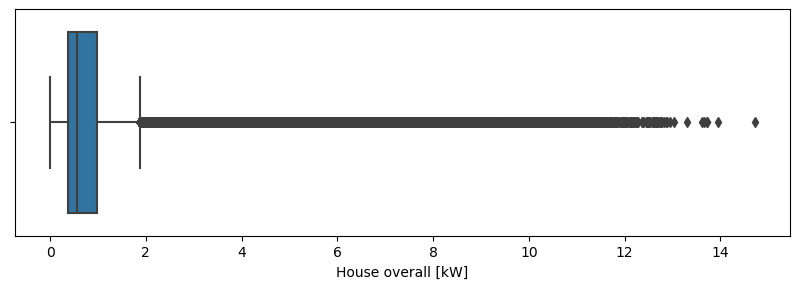

In [26]:
plt.figure(figsize=(10, 3), dpi = 100)
sns.boxplot(df['House overall [kW]'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temperature'>

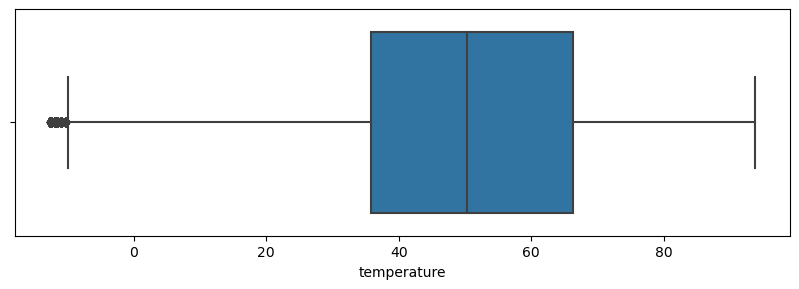

In [27]:
plt.figure(figsize=(10, 3), dpi = 100)
sns.boxplot(df['temperature'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(503844, 31)

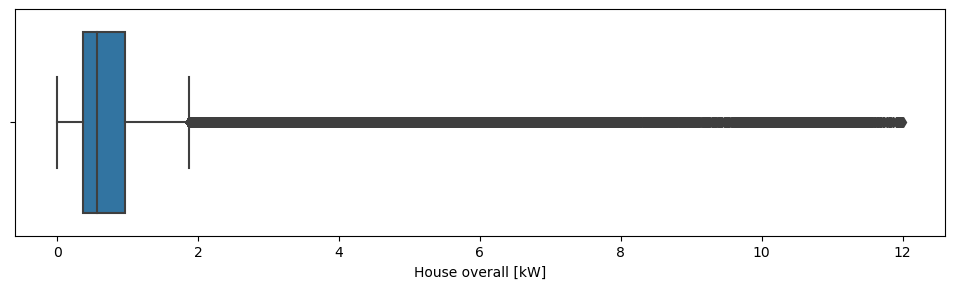

In [26]:
df = df[df['House overall [kW]'] < 12] # Removing rows with high electricty spending because it was an uncommon occurence
plt.figure(figsize=(12, 3), dpi = 100)
sns.boxplot(df['House overall [kW]'])

df.shape
#  37 ROWS removed

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='apparentTemperature'>

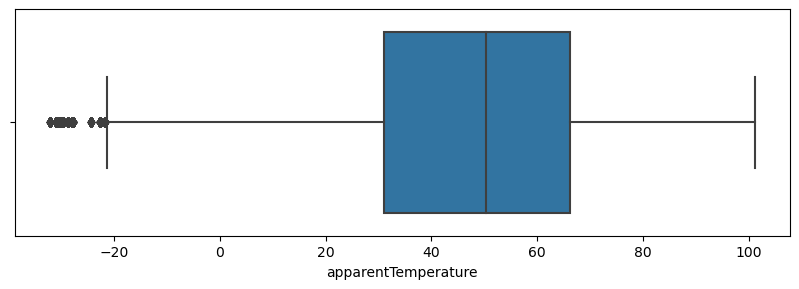

In [27]:
plt.figure(figsize=(10, 3), dpi = 100)
sns.boxplot(df['apparentTemperature'])
#Doesnt make sense to remove any outliers because temperature is -ve in winters

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precipIntensity'>

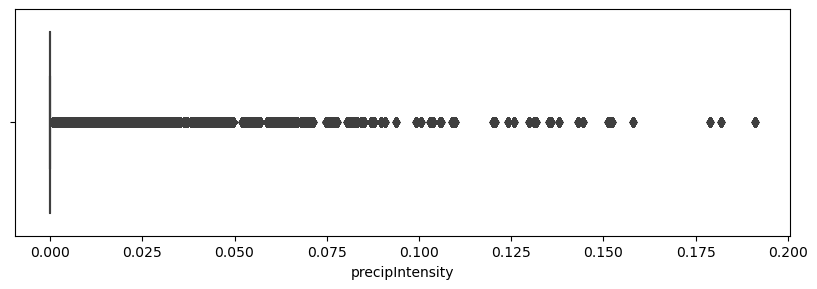

In [28]:
plt.figure(figsize=(10, 3), dpi = 100)
sns.boxplot(df['precipIntensity'])

## Inferential Analysis

In [ ]:
#from scipy.stats import chi2_contingency
#from scipy.stats import chi2

#def chi_square_test(cat_cols, df):
 #   for i in range(3):  #(len(cat_cols)-1):
  #      print("\n\t --------"+cat_cols[i]+"--------")
   #     for j in range(i+1,4): #len(cat_cols)):
    #        cat_var1 = cat_cols[i]
     #       cat_var2 = cat_cols[j]
      #      data_crosstab = pd.crosstab(df[cat_var1], df[cat_var2], margins = False) 
       #     print(data_crosstab) 
#
 #           stat, p, dof, expected = chi2_contingency(data_crosstab)
  #          print('dof=%d' % dof)
   #         print(expected)
#
 #   # interpret p-value
  #          alpha = 0.05
   #         print('significance=%.3f, p=%.3f' % (alpha, p))
    #        if p <= alpha:
     #           print('Dependent (reject H0)')
      #      else:
       #         print('Independent (fail to reject H0)')
        #    print("\n")

In [ ]:
#chi_square_test(categorical_columns,df)

In [ ]:
#from statsmodels.stats.multicomp import pairwise_tukeyhsd


#def tukeyhsd_test(num_cols, cat_cols, d
 #   for i in range(3):#(len(num_cols)-1):
 #       num_var = num_cols[i]
  #      print("\t-------------"+num_var+"-------------")
   #     for j in range(3):#(len(cat_cols)-1):
    #        cat_var = cat_cols[j]
     #       tukey = pairwise_tukeyhsd(endog=df[num_var], groups=df[cat_var], alpha=0.05)
      #      #display results
       #     
        #    print(cat_var)
         #   print(tukey)
          #  print()#

In [ ]:
#tukeyhsd_test(numeric_columns, categorical_columns, df)

In [ ]:
# T-Test

#def get_num_cols(df):
 #   types_map = df.dtypes.to_dict()
  #  num_columns = []
   # for k,v in types_map.items():
    #    if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
     #       num_columns.append(k)
#
 #   #print(num_columns)
  #  return num_columns
#
#def t_test(df):
 #   num_columns = get_num_cols(df)
  #  for i in range(3): #(len(num_columns)-1):
   #     print("\n --------"+num_columns[i]+"--------")
    #    for j in range(i+1, 5): #(i+1,len(num_columns)):
     #       col1 = num_columns[i]
      #      col2 = num_columns[j]
       #     t_val, p_val = stats.ttest_ind(df[col1], df[col2])
        #    if(p_val<0.05):
         #       print("Dependent (reject H0) \t(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
          #  
           # else:
            #       print('Independent (fail to reject H0)',num_columns[i], num_columns[j])


### ANOVA
Bewteen one numerical and other categorical variable
Here the best columns to run inferential analysis on are:
1. "House Overall" and "Summary' to confirm our assumption
which is that changing weather conditions will affect the electricity consumption
2. Electricity generation "gen [kW] "and weather conditions  "summary" to see how the electricity 
generation changes over changing weathers

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

y=df['House overall [kW]']
model = ols('y ~ C(Q("summary"))', data=df).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
display(anova_table)

,sum_sq,df,F,PR(>F)
"C(Q(""summary""))",1412.866490,17.0,75.60828,1.434776e-262
Residual,553813.348465,503826.0,NaN,NaN


In [30]:
y=df['gen [kW]']
model = ols('y ~ C(Q("summary"))', data=df).fit()
anova_table=sm.stats.anova_lm(model, typ=2)
display(anova_table)

,sum_sq,df,F,PR(>F)
"C(Q(""summary""))",32.163842,17.0,115.143767,0.0
Residual,8278.642629,503826.0,NaN,NaN


In [32]:
#From the anova test above, we see that house overall electrivity usage and generation is very sognificantly changing across weather
#I think the wrangling part is now complete and we can move on for our analsyis. 
df.to_csv('HomeCleaned.csv')